
Topic: Telco Customer Churn analysis project.

Research Question: "What are the factors that significantly influence customer churn in a telecommunications company, and how can these insights be used to develop effective customer retention strategies?"

In [3]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')


## 1. Data Loading and Initial Inspection

In [6]:
# load the dataset
df = pd.read_csv('Telco_Customer_Churn.csv')

# view the first few rows of data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The SeniorCitizen column can be converted from binary numeric to categorical type

In [10]:
# Check dataset information

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The column "TotalCharges" is of object type and must be converted to numeric type.

In [13]:
# Check for missing values

print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


No missing values in the dataset

## 2. Data Preprocessing

In [17]:
# Handling empty blank spaces in the column
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)

In [19]:
# Convert 'TotalCharges' to numeric datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [21]:
# Check dataset info again to verify
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
# convert 'SeniorCitizen' from (binary) numeric to categorical for better understanding.

df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'yes' if x == 1 else 'no')

In [27]:
# verify changes made

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# check the summary statistics for all numerical columns

df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [31]:
# check summary statistics for all categorical columns

df.describe(include='object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,no,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


## 3. Exploratory Data Analysis (EDA)

In [34]:
# Number of customer that have churned

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

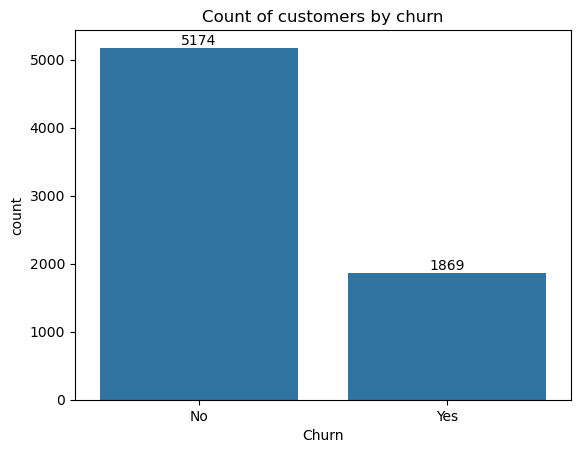

In [36]:
# Count plot showing the number of customers that have churned out

ax = sns.countplot(x='Churn', data=df)
plt.title("Count of customers by churn")
ax.bar_label(ax.containers[0])
plt.show()

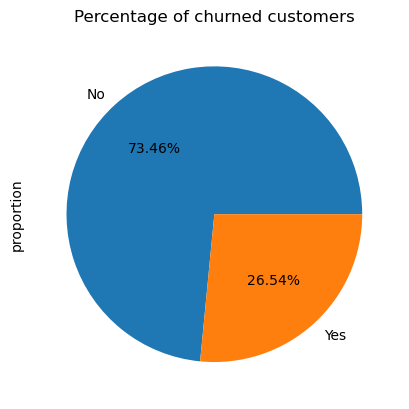

In [38]:
# Pie chart to view the percentage of customers that have churned out or not

df['Churn'].value_counts(normalize=True).plot(kind='pie', autopct='%1.2f%%')
plt.title("Percentage of churned customers")
plt.show()

From our analysis,we have found that 1869 customers which is 26.54% of the customers have churned in total.

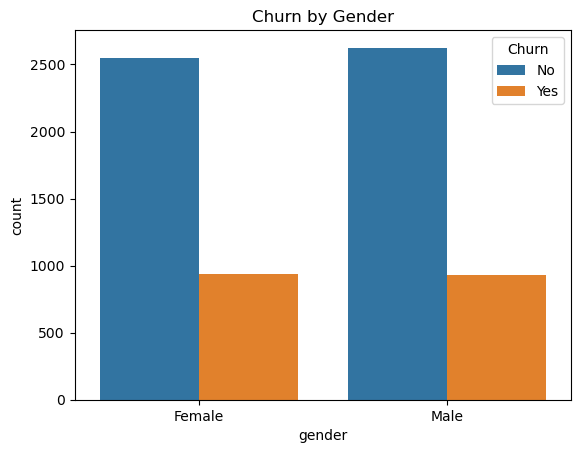

In [41]:
# Explore churn by gender
# count plot to visualize churn by gender
# How many male and female customers have churned

sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()

We can see also equal amount customers have churned, and it is not gender specific. For Telco, Gender of the customer does not correlated with customer churn.

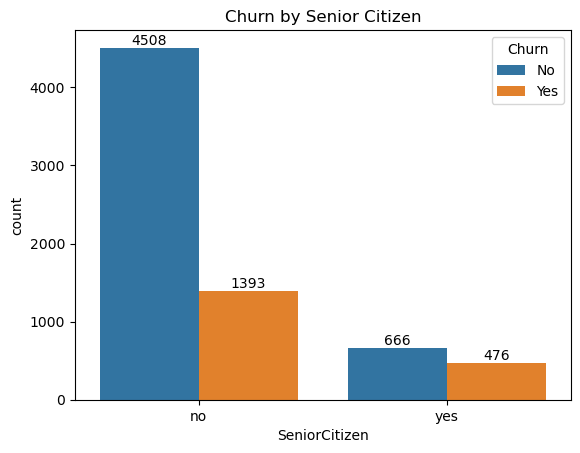

In [44]:
# By Senior Citizen Status
# count plot to visualize churn by senior citizen
# How many senior customers have churned

ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Senior Citizen")

plt.show()

We find that there is a higher churn rate if a customer is a senior citizen comparatively when a customer is not a senior citizen.

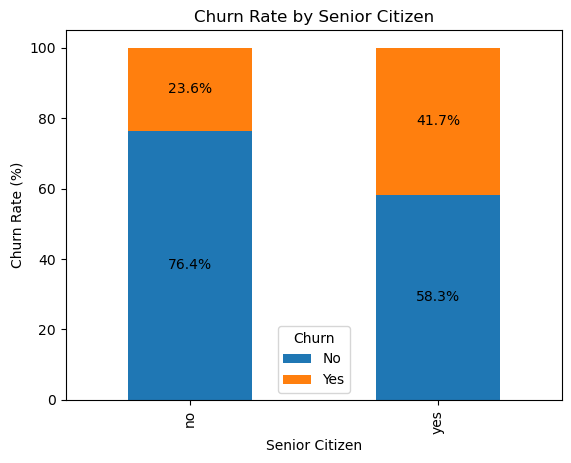

In [47]:
# create a stack plot to find churn in senior citizens

senior_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
ax = senior_churn.plot(kind='bar', stacked=True)
plt.title("Churn Rate by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Churn Rate (%)")

# Annotate bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:.1f}%'.format(height),
            ha='center',
            va='center')

plt.show()

So the churn rate in senior citizen in approx 42%, compared to approx 24% when the customer is not a senior citizen. Comparatively a greater percentage of people that are snior citizen have churned.

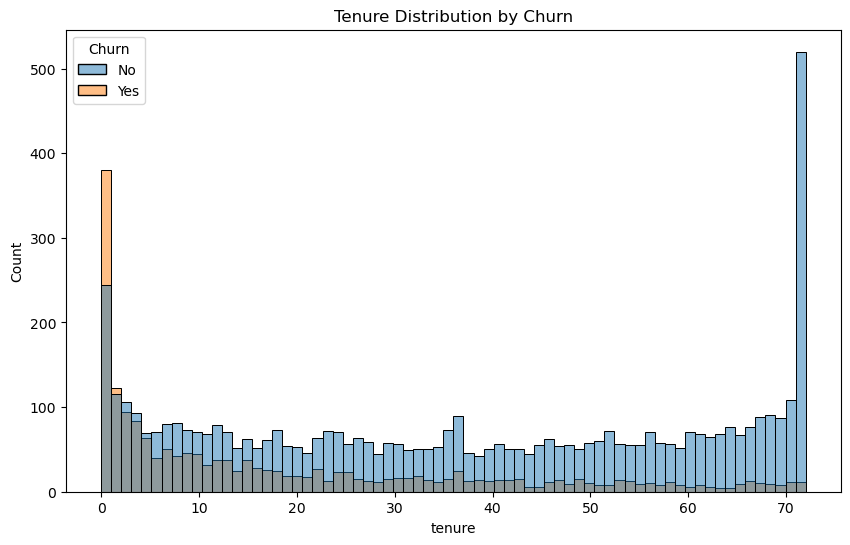

In [50]:
# Tenure Analysis
# Histogram to visualize tenure distribution

plt.figure(figsize=(10, 6))
sns.histplot(x='tenure', hue='Churn', data=df, bins=70)
plt.title("Tenure Distribution by Churn")
plt.show()

From the histogram, we can see that the most of the customers have churned in the first month. There are customers that have stayed with the company for 72 months (6 years). The majority of churn rate is in the initial days that the customer signed up for the service. People using the services for longer periods of time have not churned and people in their first or second month have churned. May be people have stayed with the company depending on the contract they have signed up with Telco. People with longer contracts stay with the company.

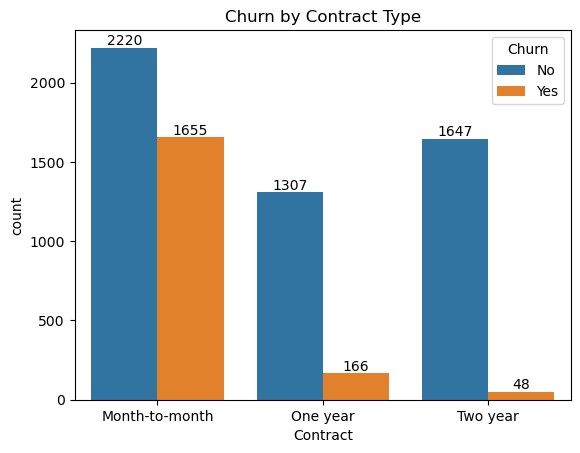

In [53]:
# Contract Type Analysis
# Count plot to visualize the churn rate by contract type

ax = sns.countplot(x='Contract', hue='Churn', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Contract Type")
plt.show()

From the above visualization we can see that the majority of the customer at Telco are signed up for a month-to-month plan followed by two-year plan. The month-to-month customer have the highest churn rate as well. The customers enrolled in a 2 yr plan have the least churn rate. There is an oppurtunity for Telco reduce churn rate by converting the month to month customers to a 1 yr or 2 yr plan.

##  4. Statistical Analysis

#### Step 1: Testing Numerical Features with a T-Test

We'll start by testing whether the means of MonthlyCharges differ between churned and non-churned customers.

Hypotheses:

Null Hypothesis (H₀): There is no association between the monthly charges and the customer churn rate.

Alternative Hypothesis (H₁): There is a statistically significant association between the monthly charges of churned and non-churned customers


In [58]:
# Separate churned and non-churned customers
churned = df[df['Churn'] == 'Yes']['MonthlyCharges']
not_churned = df[df['Churn'] == 'No']['MonthlyCharges']

# Perform independent t-test
t_stat, p_value = ttest_ind(churned, not_churned)
print(f"T-Test for MonthlyCharges: t-statistic = {t_stat}, p-value = {p_value}")

T-Test for MonthlyCharges: t-statistic = 16.536738015936308, p-value = 2.7066456068884154e-60


We get t-statistic of 16.54 and the p-value of 2.71e-60 which is extremely small, much less than the common significance level of 𝛼 = 0.05 α=0.05. 

This result suggests that Monthly Charges play a significant role in customer churn for the telecommunications company. 

The large t-statistic indicates a substantial difference in average Monthly Charges between customers who churned and those who did not.

This means we reject the null hypothesis and There is a statistically significant difference in mean Monthly Charges between churned and non-churned customers

Conclusion: 

Customers who churn have significantly different MonthlyCharges compared to those who do not churn. Next, we can calculate and visualize the mean charges for both groups to better understand the direction of the difference.

Monthly charges of non-churned customers: $61.27
Monthly charges of churned customers: $74.44



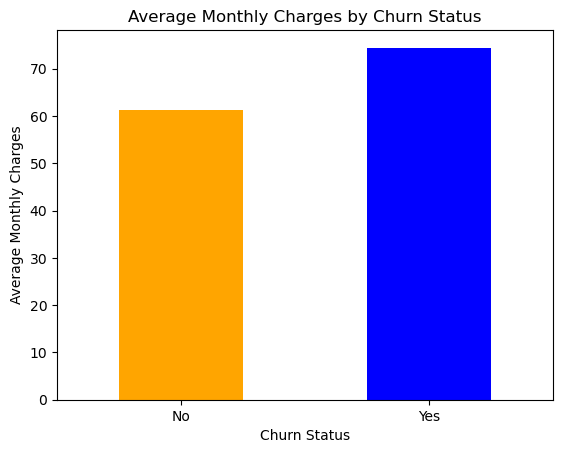

In [61]:
# Code to Visualize Mean Charges
mean_charges = df.groupby('Churn')['MonthlyCharges'].mean()

print(f"Monthly charges of non-churned customers: ${mean_charges[0]:.2f}")
print(f"Monthly charges of churned customers: ${mean_charges[1]:.2f}\n")

# Visualize using a bar plot
mean_charges.plot(kind='bar', color=['orange', 'blue'])
plt.title('Average Monthly Charges by Churn Status')
plt.ylabel('Average Monthly Charges')
plt.xlabel('Churn Status')
plt.xticks(rotation=0)
plt.show()


Interpretation of Mean Charges by Churn Status 

Churned Customers: The average MonthlyCharges for customers who churned is $74.44. 

Non-Churned Customers: The average MonthlyCharges for customers who did not churn is $61.27. Difference:

Customers who churned pay, on average, $13.17 more per month compared to those who stayed. 

What Does This Mean for the Business? 

Higher Charges Increase Churn Risk: Customers with higher monthly charges are more likely to churn. 

This insight suggests that the company may want to:

- Offer targeted discounts or promotions to retain them. 
- Explore ways to reduce the monthly charges for these customers (e.g., bundle services or loyalty rewards).

#### Step 2: Testing Associations with Categorical Features Using Chi-Square
Now, we’ll test if there is a significant association between churn and Contract type.

Hypotheses
Null Hypothesis (H₀): There is no association between the contract type and the customer churn rate.

Alternative Hypothesis (H₁): There is a significant association between contract type and customer churn rate.

In [65]:
# Create contingency table for Contract and Churn
contingency_table = pd.crosstab(df['Contract'], df['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Contract: chi2 = {chi2}, p-value = {p}")

Chi-Square Test for Contract: chi2 = 1184.5965720837926, p-value = 5.863038300673391e-258


Test Statistic: The Chi-Square statistic of 1184.60 is quite large, which indicates a strong association between the variables "Contract" and "Churn."

P-value: The p-value of 5.86e-258 is extremely small, far below the commonly used significance level (α) of 0.05.

This means we reject the null hypothesis: There is a statistically significant association between Contract and Churn. 

Since the p-value is significantly smaller than 0.05, we reject the null hypothesis and conclude that there is sufficient evidence to support the claim that "Contract" and "Churn" are dependent variables. In other words, the type of contract a customer has is statistically associated with whether they churn or not.

Conclusion:

The type of contract a customer has (e.g., month-to-month, one-year, or two-year) is significantly associated with their likelihood of churning. Customers with certain contract types are more likely to churn than others.

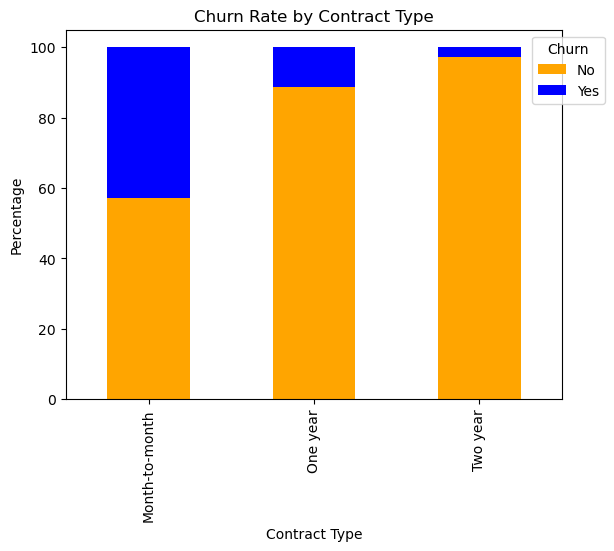

In [68]:
# Let’s explore how Contract types differ in their churn rates.

# Create a stacked bar plot for Contract and Churn
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot the churn rate by Contract type
contract_churn.plot(kind='bar', stacked=True, color=['orange', 'blue'])
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.10, 1))

plt.show()

Interpretation of the Visualization From the stacked bar chart of Contract type and Churn:

Month-to-Month Contracts:

A high proportion of churners are evident in this category. This flexibility allows customers to terminate the service easily, making churn more frequent.

One-Year Contracts:

Churn is significantly lower compared to month-to-month contracts. Commitment over one year may reduce the likelihood of churn.

Two-Year Contracts:

This category exhibits the lowest churn rate. Customers in this group are less likely to leave, as long-term contracts often include discounts and require a higher level of commitment. Key Takeaways Customer retention is highly influenced by contract type.

Insights:

Month-to-month contracts are a significant churn risk. Longer contract durations (one-year or two-year) correlate with higher customer retention. This insight aligns with the chi-square test, showing a strong relationship between Contract type and churn.

#### Step 3: Testing Associations with Categorical Features Using Chi-Square

Now, we’ll test if there is a significant association between churn and InternetService.

Hypotheses
Null Hypothesis (H₀): There is no association between the InternetSerive type and the customer churn rate.

Alternative Hypothesis (H₁): There is a significant association between InternetSerive type and customer churn rate.

In [72]:
# Create contingency table
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Contract: chi2 = {chi2}, p-value = {p}")

Chi-Square Test for Contract: chi2 = 732.309589667794, p-value = 9.571788222840544e-160


In [74]:

# Display contingency table
print(contingency_table)

Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


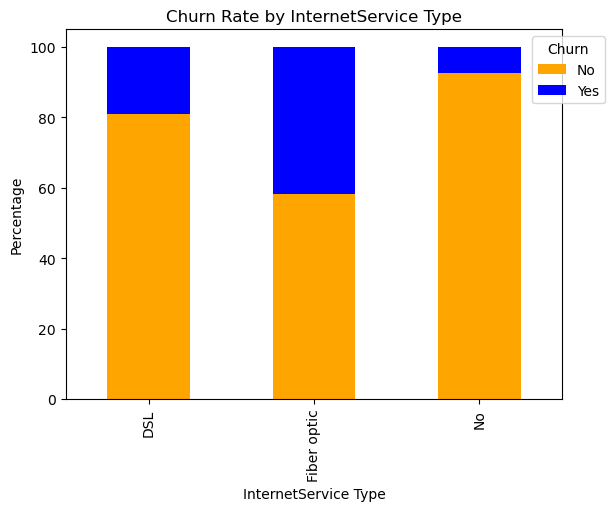

In [76]:
# Let’s explore how InternetService types differ in their churn rates. 
# We can visualize the data to understand which groups drive the relationship.

# Create a stacked bar plot for InternetService and Churn
contract_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot the churn rate by Contract type
contract_churn.plot(kind='bar', stacked=True, color=['orange', 'blue'])
plt.title('Churn Rate by InternetService Type')
plt.xlabel('InternetService Type')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right',bbox_to_anchor=(1.10, 1))
plt.show()

Our analysis reveals a significant association between Internet Service type and churn, with customers using Fiber Optic showing the highest churn rates. This suggests that potential issues either with service dissatisfaction or higher costs that the customers may be experiencing. To address this, the company should focus on investigating service quality issues and offer better technical support for Fiber Optics users to improve customer retention and reduce churn. 